In [1]:
# Section must be included at the beginning of each new notebook. Remember to change the app name. 
# If you're using VirtualBox, change the below to '/home/user/spark-2.1.1-bin-hadoop2.7'
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('basics').getOrCreate()

In [2]:
# Let's read in the data. If you open the dataset, you'll find that each column has a header. We specify that by stating that header=True.
# To make our lives easier, we can also use 'inferSchema' when importing CSVs. This automatically detects data types.
# If you would like to manually change data types, refer to this article: https://medium.com/@mrpowers/adding-structtype-columns-to-spark-dataframes-b44125409803
df = spark.read.csv('Absenteeism_at_work.csv',header=True,inferSchema=True)

In [3]:
# The show method allows you visualise DataFrames in a tabular format. 
df.show(10)

+---+------------------+----------------+---------------+-------+----------------------+-------------------------------+------------+---+----------------------+----------+--------------------+---------+---+--------------+-------------+---+------+------+---------------+-------------------------+
| ID|Reason_for_absence|Month_of_absence|Day_of_the_week|Seasons|Transportation_expense|Distance_from_Residence_to_Work|Service_time|Age|Work_load_Average/day |Hit_target|Disciplinary_failure|Education|Son|Social_drinker|Social_smoker|Pet|Weight|Height|Body_mass_index|Absenteeism_time_in_hours|
+---+------------------+----------------+---------------+-------+----------------------+-------------------------------+------------+---+----------------------+----------+--------------------+---------+---+--------------+-------------+---+------+------+---------------+-------------------------+
| 11|                26|               7|              3|      1|                   289|                        

In [4]:
# Print schema allows us to visualise the data structure at a high level. 
df.printSchema()

# We can also use head to print a specific amount of rows, so we can get a better understanding of the data points. 
# Note that we have to specify 'print' depending on the method we're using. Otherwise it may not show up!
print(df.head(1))

root
 |-- ID: integer (nullable = true)
 |-- Reason_for_absence: integer (nullable = true)
 |-- Month_of_absence: integer (nullable = true)
 |-- Day_of_the_week: integer (nullable = true)
 |-- Seasons: integer (nullable = true)
 |-- Transportation_expense: integer (nullable = true)
 |-- Distance_from_Residence_to_Work: integer (nullable = true)
 |-- Service_time: integer (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Work_load_Average/day : double (nullable = true)
 |-- Hit_target: integer (nullable = true)
 |-- Disciplinary_failure: integer (nullable = true)
 |-- Education: integer (nullable = true)
 |-- Son: integer (nullable = true)
 |-- Social_drinker: integer (nullable = true)
 |-- Social_smoker: integer (nullable = true)
 |-- Pet: integer (nullable = true)
 |-- Weight: integer (nullable = true)
 |-- Height: integer (nullable = true)
 |-- Body_mass_index: integer (nullable = true)
 |-- Absenteeism_time_in_hours: integer (nullable = true)

[Row(ID=11, Reason_for_absence

In [5]:
# We can use the describe method get some general statistics on our data too. 
df.describe().show()

+-------+------------------+------------------+------------------+------------------+------------------+----------------------+-------------------------------+------------------+-----------------+----------------------+-----------------+--------------------+------------------+------------------+-------------------+-------------------+------------------+------------------+------------------+------------------+-------------------------+
|summary|                ID|Reason_for_absence|  Month_of_absence|   Day_of_the_week|           Seasons|Transportation_expense|Distance_from_Residence_to_Work|      Service_time|              Age|Work_load_Average/day |       Hit_target|Disciplinary_failure|         Education|               Son|     Social_drinker|      Social_smoker|               Pet|            Weight|            Height|   Body_mass_index|Absenteeism_time_in_hours|
+-------+------------------+------------------+------------------+------------------+------------------+------------------

In [6]:
# Let's select the columns that are integers, and use the describe method again.
# We see that the average age is 41. The average bank account balance is $1,074. 
# And they spoke to call centre reps for approx. 931 seconds on average. 
df.select('ID', 'Reason_for_absence', 'age','Education', 'Son', 'Social_drinker', 'Social_smoker', 'Pet', 'Weight', 'Body_mass_index', 'Absenteeism_time_in_hours', 'Height').describe().show()

+-------+------------------+------------------+-----------------+------------------+------------------+-------------------+-------------------+------------------+------------------+------------------+-------------------------+------------------+
|summary|                ID|Reason_for_absence|              age|         Education|               Son|     Social_drinker|      Social_smoker|               Pet|            Weight|   Body_mass_index|Absenteeism_time_in_hours|            Height|
+-------+------------------+------------------+-----------------+------------------+------------------+-------------------+-------------------+------------------+------------------+------------------+-------------------------+------------------+
|  count|               740|               740|              740|               740|               740|                740|                740|               740|               740|               740|                      740|               740|
|   mean|18.0175

In [7]:
# Let's select the balance column and assign it to a variable. 
df= df.select('ID', 'Reason_for_absence', 'age','Education', 'Son', 'Social_drinker', 'Social_smoker', 'Pet', 'Weight', 'Body_mass_index', 'Absenteeism_time_in_hours', 'Height')

# We can then use the show method on that variable.
df.show()

+---+------------------+---+---------+---+--------------+-------------+---+------+---------------+-------------------------+------+
| ID|Reason_for_absence|age|Education|Son|Social_drinker|Social_smoker|Pet|Weight|Body_mass_index|Absenteeism_time_in_hours|Height|
+---+------------------+---+---------+---+--------------+-------------+---+------+---------------+-------------------------+------+
| 11|                26| 33|        1|  2|             1|            0|  1|    90|             30|                        4|   172|
| 36|                 0| 50|        1|  1|             1|            0|  0|    98|             31|                        0|   178|
|  3|                23| 38|        1|  0|             1|            0|  0|    89|             31|                        2|   170|
|  7|                 7| 39|        1|  2|             1|            1|  0|    68|             24|                        4|   168|
| 11|                23| 33|        1|  2|             1|            0|  1| 

In [8]:
# Let's try out some additional DataFrame methods.
# How would we identify individuals with a balance above $5,000? Using filter! 
df.filter("ID=1").show()

# We can also use more advanced filters. For example, let's see the jobs of people with over $2,500 in their bank account.
df.filter("ID=1").select('Absenteeism_time_in_hours','Reason_for_absence').show()

+---+------------------+---+---------+---+--------------+-------------+---+------+---------------+-------------------------+------+
| ID|Reason_for_absence|age|Education|Son|Social_drinker|Social_smoker|Pet|Weight|Body_mass_index|Absenteeism_time_in_hours|Height|
+---+------------------+---+---------+---+--------------+-------------+---+------+---------------+-------------------------+------+
|  1|                22| 37|        3|  1|             0|            0|  1|    88|             29|                        8|   172|
|  1|                23| 37|        3|  1|             0|            0|  1|    88|             29|                        4|   172|
|  1|                26| 37|        3|  1|             0|            0|  1|    88|             29|                        8|   172|
|  1|                 7| 37|        3|  1|             0|            0|  1|    88|             29|                        3|   172|
|  1|                13| 37|        3|  1|             0|            0|  1| 

In [9]:
# Let's try out some additional DataFrame methods.
# How would we identify individuals with a balance above $5,000? Using filter! 
df.filter("ID=18").show()

# We can also use more advanced filters. For example, let's see the jobs of people with over $2,500 in their bank account.
df.filter("ID=18").select('Absenteeism_time_in_hours','Reason_for_absence').show()

+---+------------------+---+---------+---+--------------+-------------+---+------+---------------+-------------------------+------+
| ID|Reason_for_absence|age|Education|Son|Social_drinker|Social_smoker|Pet|Weight|Body_mass_index|Absenteeism_time_in_hours|Height|
+---+------------------+---+---------+---+--------------+-------------+---+------+---------------+-------------------------+------+
| 18|                10| 28|        2|  0|             0|            0|  0|    84|             25|                        8|   182|
| 18|                18| 28|        2|  0|             0|            0|  0|    84|             25|                        8|   182|
| 18|                23| 28|        2|  0|             0|            0|  0|    84|             25|                        1|   182|
| 18|                 0| 28|        2|  0|             0|            0|  0|    84|             25|                        0|   182|
| 18|                26| 28|        2|  0|             0|            0|  0| 

In [10]:
# To simplify things, let's split this into two steps. First, let's create a variable then order by age.
# Careful when using show()! Otherwise the variable type will change and you won't be able to order it. 
group_job_df = df.groupBy('ID').mean()

# Note that we have to use 'avg(age)' instead of age. Why? Because when you use mean(), it changes the feature's name (as you can see below).
print("Sorted by Absenteeism_time_in_hours")
group_job_df.orderBy('avg(Absenteeism_time_in_hours)').show()

# Let's see what this looks like in one line.
print("Sorted by Body_mass_index")
df.groupBy('ID').mean().orderBy('avg(Body_mass_index)').show()


Sorted by Absenteeism_time_in_hours
+---+-------+-----------------------+--------+--------------+--------+-------------------+------------------+--------+-----------+--------------------+------------------------------+-----------+
| ID|avg(ID)|avg(Reason_for_absence)|avg(age)|avg(Education)|avg(Son)|avg(Social_drinker)|avg(Social_smoker)|avg(Pet)|avg(Weight)|avg(Body_mass_index)|avg(Absenteeism_time_in_hours)|avg(Height)|
+---+-------+-----------------------+--------+--------------+--------+-------------------+------------------+--------+-----------+--------------------+------------------------------+-----------+
|  8|    8.0|                    0.0|    39.0|           1.0|     2.0|                1.0|               0.0|     2.0|      100.0|                35.0|                           0.0|      170.0|
| 35|   35.0|                    0.0|    53.0|           1.0|     1.0|                0.0|               0.0|     1.0|       77.0|                25.0|                           0.0|  

In [11]:
# Let's select the columns that are integers, and use the describe method again.
# We see that the average age is 41. The average bank account balance is $1,074. 
# And they spoke to call centre reps for approx. 931 seconds on average. 
df.select('ID', 'Reason_for_absence', 'age','Education', 'Son', 'Social_drinker', 'Social_smoker', 'Pet', 'Weight', 'Body_mass_index', 'Absenteeism_time_in_hours', 'Height').describe().show()

+-------+------------------+------------------+-----------------+------------------+------------------+-------------------+-------------------+------------------+------------------+------------------+-------------------------+------------------+
|summary|                ID|Reason_for_absence|              age|         Education|               Son|     Social_drinker|      Social_smoker|               Pet|            Weight|   Body_mass_index|Absenteeism_time_in_hours|            Height|
+-------+------------------+------------------+-----------------+------------------+------------------+-------------------+-------------------+------------------+------------------+------------------+-------------------------+------------------+
|  count|               740|               740|              740|               740|               740|                740|                740|               740|               740|               740|                      740|               740|
|   mean|18.0175

In [12]:
#clean data

In [13]:
#import findspark
#findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
#import pyspark
#from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('missing').getOrCreate()

In [14]:
df= df.select('ID', 'Reason_for_absence', 'age','Education', 'Son', 'Social_drinker', 'Social_smoker', 'Pet', 'Weight', 'Body_mass_index', 'Absenteeism_time_in_hours', 'Height')

# Let's visually inspect the data. You may notice some nulls in the marital and balance column. 
df.show()
print("Total data points:", df.count())

+---+------------------+---+---------+---+--------------+-------------+---+------+---------------+-------------------------+------+
| ID|Reason_for_absence|age|Education|Son|Social_drinker|Social_smoker|Pet|Weight|Body_mass_index|Absenteeism_time_in_hours|Height|
+---+------------------+---+---------+---+--------------+-------------+---+------+---------------+-------------------------+------+
| 11|                26| 33|        1|  2|             1|            0|  1|    90|             30|                        4|   172|
| 36|                 0| 50|        1|  1|             1|            0|  0|    98|             31|                        0|   178|
|  3|                23| 38|        1|  0|             1|            0|  0|    89|             31|                        2|   170|
|  7|                 7| 39|        1|  2|             1|            1|  0|    68|             24|                        4|   168|
| 11|                23| 33|        1|  2|             1|            0|  1| 

In [15]:
# 'na' stands for Not Available. Using na, we can then use drop. 
# After using show, you'll find that the rows with the null values are gone. 
df.na.drop().show()

# Let's see how many rows of data we have now. 
print("Total data points:", df.count())

+---+------------------+---+---------+---+--------------+-------------+---+------+---------------+-------------------------+------+
| ID|Reason_for_absence|age|Education|Son|Social_drinker|Social_smoker|Pet|Weight|Body_mass_index|Absenteeism_time_in_hours|Height|
+---+------------------+---+---------+---+--------------+-------------+---+------+---------------+-------------------------+------+
| 11|                26| 33|        1|  2|             1|            0|  1|    90|             30|                        4|   172|
| 36|                 0| 50|        1|  1|             1|            0|  0|    98|             31|                        0|   178|
|  3|                23| 38|        1|  0|             1|            0|  0|    89|             31|                        2|   170|
|  7|                 7| 39|        1|  2|             1|            1|  0|    68|             24|                        4|   168|
| 11|                23| 33|        1|  2|             1|            0|  1| 

In [16]:
# It's good practice to specify the column to be filled. 
# In this case, as we know that marital has some missing values, let's fill the null values with the text "UNDISCLOSED".
filled_df = df.na.fill(0)
filled_df.show()
print("Total data points:", df.count())

+---+------------------+---+---------+---+--------------+-------------+---+------+---------------+-------------------------+------+
| ID|Reason_for_absence|age|Education|Son|Social_drinker|Social_smoker|Pet|Weight|Body_mass_index|Absenteeism_time_in_hours|Height|
+---+------------------+---+---------+---+--------------+-------------+---+------+---------------+-------------------------+------+
| 11|                26| 33|        1|  2|             1|            0|  1|    90|             30|                        4|   172|
| 36|                 0| 50|        1|  1|             1|            0|  0|    98|             31|                        0|   178|
|  3|                23| 38|        1|  0|             1|            0|  0|    89|             31|                        2|   170|
|  7|                 7| 39|        1|  2|             1|            1|  0|    68|             24|                        4|   168|
| 11|                23| 33|        1|  2|             1|            0|  1| 

In [17]:
#linear regression

In [18]:
# Section must be included at the beginning of each new notebook. Remember to change the app name.
# If you're using VirtualBox, change the below to '/home/user/spark-2.1.1-bin-hadoop2.7'
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('linear_regression_adv').getOrCreate()

# If you're getting an error with numpy, please type 'sudo pip3 install numpy --user' into the console.
# If you're getting an error with another package, type 'sudo pip3 install PACKAGENAME --user'. 
# Replace PACKAGENAME with the relevant package (such as pandas, etc).
from pyspark.ml.regression import LinearRegression

# First, let's import the data. Note that we can infer the schema as it's a CSV file.
#df = spark.read.csv("Datasets/boston_housing_data.csv",inferSchema=True,header=True)


In [19]:
# Let's explore. Here's the first row of the data.
print(df.head())

# And the entire data structure. 
df.printSchema()

Row(ID=11, Reason_for_absence=26, age=33, Education=1, Son=2, Social_drinker=1, Social_smoker=0, Pet=1, Weight=90, Body_mass_index=30, Absenteeism_time_in_hours=4, Height=172)
root
 |-- ID: integer (nullable = true)
 |-- Reason_for_absence: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- Education: integer (nullable = true)
 |-- Son: integer (nullable = true)
 |-- Social_drinker: integer (nullable = true)
 |-- Social_smoker: integer (nullable = true)
 |-- Pet: integer (nullable = true)
 |-- Weight: integer (nullable = true)
 |-- Body_mass_index: integer (nullable = true)
 |-- Absenteeism_time_in_hours: integer (nullable = true)
 |-- Height: integer (nullable = true)



In [20]:
# Now that we understand the data's features, let's use a Python package to neatly describe the data.
import pandas as pd
df.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
ID,740,18.017567567567568,11.021247263063657,1,36
Reason_for_absence,740,19.216216216216218,8.43340588279965,0,28
age,740,36.45,6.478772457611868,27,58
Education,740,1.2918918918918918,0.6732380415251598,1,4
Son,740,1.018918918918919,1.0984890195302817,0,4
Social_drinker,740,0.5675675675675675,0.49574866720003496,0,1
Social_smoker,740,0.07297297297297298,0.2602680502800183,0,1
Pet,740,0.745945945945946,1.3182582913258336,0,8
Weight,740,79.03513513513514,12.883210507177214,56,108


In [21]:
df1=df. select( 'ID','Reason_for_absence', 'age', 'Son',  'Pet', 'Weight', 'Body_mass_index','Absenteeism_time_in_hours')
df1.show()

+---+------------------+---+---+---+------+---------------+-------------------------+
| ID|Reason_for_absence|age|Son|Pet|Weight|Body_mass_index|Absenteeism_time_in_hours|
+---+------------------+---+---+---+------+---------------+-------------------------+
| 11|                26| 33|  2|  1|    90|             30|                        4|
| 36|                 0| 50|  1|  0|    98|             31|                        0|
|  3|                23| 38|  0|  0|    89|             31|                        2|
|  7|                 7| 39|  2|  0|    68|             24|                        4|
| 11|                23| 33|  2|  1|    90|             30|                        2|
|  3|                23| 38|  0|  0|    89|             31|                        2|
| 10|                22| 28|  1|  4|    80|             27|                        8|
| 20|                23| 36|  4|  0|    65|             23|                        4|
| 14|                19| 34|  2|  0|    95|           

In [22]:
# Now that we understand the data's features, let's use a Python package to neatly describe the data.
import pandas as pd
df1.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
ID,740,18.017567567567568,11.021247263063657,1,36
Reason_for_absence,740,19.216216216216218,8.43340588279965,0,28
age,740,36.45,6.478772457611868,27,58
Son,740,1.018918918918919,1.0984890195302817,0,4
Pet,740,0.745945945945946,1.3182582913258336,0,8
Weight,740,79.03513513513514,12.883210507177214,56,108
Body_mass_index,740,26.677027027027027,4.285452223167274,19,38
Absenteeism_time_in_hours,740,6.924324324324324,13.330998100978196,0,120


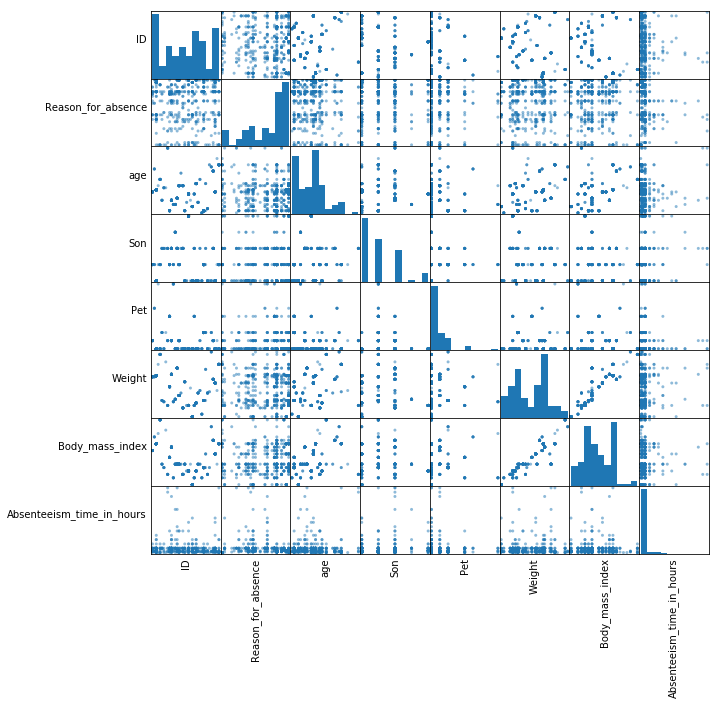

In [24]:
import pandas as pd

from pandas.plotting import scatter_matrix
numeric_features = [t[0] for t in df1.dtypes if t[1] == 'int' or t[1] == 'double']
sampled_data = df1.select(numeric_features).sample(False, 0.8).toPandas()
axs = pd.plotting.scatter_matrix(sampled_data, figsize=(10, 10))
n = len(sampled_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

In [25]:
# Import VectorAssembler and Vectors
from pyspark.ml.feature import VectorAssembler

# The input columns are the feature column names, and the output column is what you'd like the new column to be named. 
vector_assembler = VectorAssembler(inputCols = ['ID', 'Reason_for_absence', 'age', 'Son', 'Pet', 'Weight', 'Body_mass_index'], outputCol = 'personal')

# Now that we've created the assembler variable, let's actually transform the data.
vector_output = vector_assembler.transform(df1)

# Using print schema, you see that the features output column has been added. 
vector_output.printSchema()

# You can see that the features column is a DenseVector that combines the various features as expected.
vector_output.head(1)

root
 |-- ID: integer (nullable = true)
 |-- Reason_for_absence: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- Son: integer (nullable = true)
 |-- Pet: integer (nullable = true)
 |-- Weight: integer (nullable = true)
 |-- Body_mass_index: integer (nullable = true)
 |-- Absenteeism_time_in_hours: integer (nullable = true)
 |-- personal: vector (nullable = true)



[Row(ID=11, Reason_for_absence=26, age=33, Son=2, Pet=1, Weight=90, Body_mass_index=30, Absenteeism_time_in_hours=4, personal=DenseVector([11.0, 26.0, 33.0, 2.0, 1.0, 90.0, 30.0]))]

In [26]:
# Because the features have been combined into one vector, we no longer need them. Below we select the features and label.
vector_output = vector_output.select(['personal', 'Absenteeism_time_in_hours'])

# You can see that the dataframe now only contains two columns. 
print(vector_output.head(1))
vector_output.show(5)

[Row(personal=DenseVector([11.0, 26.0, 33.0, 2.0, 1.0, 90.0, 30.0]), Absenteeism_time_in_hours=4)]
+--------------------+-------------------------+
|            personal|Absenteeism_time_in_hours|
+--------------------+-------------------------+
|[11.0,26.0,33.0,2...|                        4|
|[36.0,0.0,50.0,1....|                        0|
|[3.0,23.0,38.0,0....|                        2|
|[7.0,7.0,39.0,2.0...|                        4|
|[11.0,23.0,33.0,2...|                        2|
+--------------------+-------------------------+
only showing top 5 rows



In [27]:
# Let's do a randomised 70/30 split. Remember, you should explain why you chose a particular split. 
train_data,test_data = vector_output.randomSplit([0.7,0.3])

# Let's see our training data.
train_data.describe().show()

# And our testing data.
test_data.describe().show()

+-------+-------------------------+
|summary|Absenteeism_time_in_hours|
+-------+-------------------------+
|  count|                      505|
|   mean|        6.984158415841584|
| stddev|       13.184426935807577|
|    min|                        0|
|    max|                      120|
+-------+-------------------------+

+-------+-------------------------+
|summary|Absenteeism_time_in_hours|
+-------+-------------------------+
|  count|                      235|
|   mean|       6.7957446808510635|
| stddev|        13.66826065511786|
|    min|                        0|
|    max|                      120|
+-------+-------------------------+



In [28]:
# Importing the LR package.
from pyspark.ml.regression import LinearRegression

# Instantiate the instance.
lr = LinearRegression(featuresCol='personal', labelCol='Absenteeism_time_in_hours')

# Fit the training data.
lr_model = lr.fit(train_data)

# Print the coefficients.
print("Coefficients: " + str(lr_model.coefficients))

# Print the intercept.
print("Intercept: " + str(lr_model.intercept) + "\n")

# Summarise the model and print out some evaluation metrics.
training_summary = lr_model.summary

# Print RMSE. 
print("RMSE: " + str(training_summary.rootMeanSquaredError))

# Print R2.
print("R2: " + str(training_summary.r2))

Coefficients: [-0.11617362110351964,-0.19627297790644832,0.266340679991815,1.2142710083297976,-0.1689119443036392,0.31785464739221975,-1.2658220594703926]
Intercept: 10.612678800991853

RMSE: 12.674667014947373
R2: 0.0739990270040507


In [29]:
train_data.describe().show()

+-------+-------------------------+
|summary|Absenteeism_time_in_hours|
+-------+-------------------------+
|  count|                      505|
|   mean|        6.984158415841584|
| stddev|       13.184426935807577|
|    min|                        0|
|    max|                      120|
+-------+-------------------------+



In [30]:
# Let's evaluate the model against the test data.
test_results = lr_model.evaluate(test_data)

# And print the RMSE/R2. As expected, our RMSE and R2 are slightly worse when applying the testing set.
print("RMSE on test data: " + str(test_results.rootMeanSquaredError))
print("R2 on test data: " + str(test_results.r2))

RMSE on test data: 13.27390221154557
R2 on test data: 0.052841353730292084
